# Exercises for Chapter 1

### Training Machine Learning Algorithms for Classification

**Question 1.** In the file `algos/perceptron.py`, implement Rosenblatt's perceptron algorithm by fleshing out the class `Perceptron`. When you're finished, run the code in the block below to test your implementation.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from algos.perceptron import Perceptron

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:100, [0, 2]].values

ppn = Perceptron()
ppn.fit(X, y)

if (ppn.errors[-1] == 0):
    print('Looks good!')
else:
    print("Looks like your classifier didn't converge to 0 :(")

Looks good!


**Question 2.** Raschka claims that without an epoch or a threshold of acceptable misclassification, the perceptron may not ever stop updating. Explain why this can happen, and give an example.

----

**Answer**: For the perceptron error to converge to 0, the algorithm must reach a point where it does not misclassify any of the training data. If the training data is not *completely* linearly separable, however, this convergence is impossible: there simply does not exist a linear combination that cleanly separates the data into two classes.

In the *Iris* dataset example that Raschka gives, we can completely separate *setosa* from *versicolor* based on petal length and sepal length (the two variables we test in the code sample above), but in most real-world data, such clean linear separation is unrealistic, and there is usually slight overlap between the two classes, even if they are generally linearly separable. By setting an epoch (maximum number of iterations) or threshold (maximum number of misclassifications that we can accept), we can ensure that the algorithm will stop training even if pure linear separation is impossible in the data.   

----

**Question 3.** The following diagram comes from Raschka's book. Try to answer the questions about it without looking back at the text.

![Classifier charts](https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/ch02/images/02_02.png)

What is being depicted in the diagram on the left? How about the diagram on the right?

----

**Answer:** The diagram on the left plots the activation function $\phi(w^{T}x)$ against the net input function $w^{T}x$ in a perceptron, demonstrating the classification effect of the activation function: when the combination of the weights and inputs is greater than 0, the classifier returns 1 (a "positive" class label), and otherwise it returns -1 (a "negative" class label). 

The diagram on the right plots two features $X_{1}$ and $X_{2}$ from an input vector against one another, showing that two classes (the red circles and blue checks) are linearly separable by the line $\phi(w^{T}x) = 0 $.

----

Describe in words what the following symbols represent in the diagram on the **left**:

1. The axes, $w^{T}x$ and $\phi(w^{T}x)$
2. The thick black line

----

**Answer:**

1. The $x$ axis, $w^{T}x$, represents the net input function of a perceptron (the linear combination of weight and input vectors). The $y$ axis, $\phi(w^{T}x)$, represents the activation function (the function that classifies the net input and returns a positive or negative class label).
2. The thick black line represents the range of possible values taken on by the activation function $\phi(w^{T}x)$. When the net input input is greater than or equal to 0, the activation funtion returns 1; otherwise it returns -1. Since it is a step function, the vertical portion of the line (shown when $w^{T}x = 0$) does not actually represent possible values in the range of $\phi(w^{T}x)$.

----

Describe in words what the following symbols represent in the diagram on the **right**:

1. The red circles
2. The blue pluses
3. The axes, $X_{1}$ and $X_{2}$
4. The vertical dashed line

----

**Answer:**

1. The red circles represent samples that are classified by a negative class label.
2. The blue pluses represent samples that are classified by a positive class label.
3. The axes $X_{1}$ and $X_{2}$ represent two features of each sample that we can use to determine their class.
4. The vertical dashed line represents the decision boundary between the two classes.

----

True or False: In the diagram on the right, $X_{1} = \phi(w^{T}x) = 0$. Explain your reasoning.

---

**Answer:** False. While the right half of this equality (that the decision surface can be modelled by $\phi(w^{T}x) = 0$) is true, the left half (that the feature $X_{1}$ is equivalent to  $\phi(w^{T}x)$, or to $0$) is not. While the figure makes it seem as if the dashed line corresponding to the decision surface is related to the feature $X_{1}$, they are in fact unrelated, and their graphical overlap is a coincidence.

---

True or False: in the general relationship depicted by the diagram on the right ($X_{1}$ vs. $X_{2}$), the dashed line must always be vertical. Explain your reasoning.

----

**Answer:** False. As the line representing the decision surface for the classifier, any line that cleanly separates the data into the two classes (positive and negative) will work.

----

**Question 4.** Plot $X$ and its standardized form $X'$ following the feature scaling algorithm that Raschka uses in the book. How does scaling the feature using the $t$-statistic change the sample distribution?

/Users/jeancochrane/.virtualenvs/learning/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


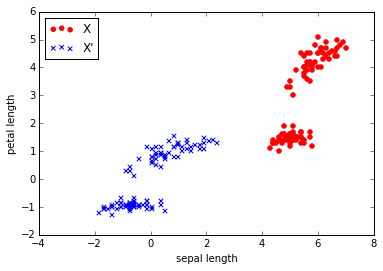

In [2]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

plt.scatter(X[:, 0], X[:, 1], color='red', marker='o', label='X')
plt.scatter(X_std[:, 0], X_std[:, 1], color='blue', marker='x', label="X'")
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

**Answer:** As we can see in the figure above, scaling $X$ using the $t$-statistic maintains the overall shape of the data while centering the axes around the origin and transforming the samples such that the axes correspond to the number of standard deviations that each sample is from the sample means $\mu_{x}$ and $\mu_{y}$ (as opposed to the unit measurements for length present in the original data).  

**Question 5.** In the file `algos/adaline.py`, implement the Adaline rule in the class `Adaline`. When you're finished, run the code in the block below to test your implementation.

In [3]:
from algos.adaline import Adaline

ada = Adaline()
ada.fit(X_std, y)

if (ada.cost[-1] < 5):
    print('Looks good!')
else:
    print("Looks like your classifier didn't find the minimum :(")

Looks good!


**Question 6.** Implement stochastic gradient descent as an option for the `Adaline` class. Then, run the test code below.

In [4]:
ada_sgd = Adaline(stochastic=True)
ada_sgd.fit(X_std, y)

if (ada_sgd.cost[1] < 1):
    print('Looks good!')
else:
    print("Looks like your stochastic model isn't performing well enough :(")

Looks good!


**Question 7.** Describe a situation in which you would choose to use batch gradient descent, a situation in which you would choose to use stochastic gradient descent, and a situation in which you would choose to use mini-batch gradient descent.

----

**Answer:** I would want to use batch gradient descent in a situation where my dataset was relatively small, but the need for precision in the final approximation is high. I would want to use mini-batch gradient descent when my dataset is quite large, and computation power is limited. I would want to use stochastic gradient descent if I wanted to stream my training data.

----

**Question 8.** Implement online learning as an option for the `Adaline` class. Then, run the test code below.

In [6]:
new_X = df.iloc[100, [0, 2]]
new_X = new_X - (np.mean(X, axis=0)) / np.std(X, axis=0)
new_y = df.iloc[100, 4]
new_y = np.where(new_y == 'Iris-setosa', 1, -1)

ada_sgd.partial_fit(new_X, new_y)

**Question 9.** Raschka claims that stochastic gradient descent could result in "cycles" if the order in which the samples were read (and corresponding weights updated) wasn't randomized, or "shuffled," before every iteration. Explain the intuition behind this idea, and describe what a "cycle" might look like.

----

**Answer:** Since SGD updates the weights with respect to each sample, and calculates the gradient separately for any given sample, it is sensitive to outliers (that is, samples with unusually large or small feature values). Intuitively, we can imagine that an outlier sample positioned at an inopportune index – close to the point where the model would converge, say – could consistently cause a model updating via SGD to "overshoot" the global minimum. Randomizing the order of the inputs helps make this kind of overshooting less likely as the iterations progress. 

----

**Question 10.** Verify that stochastic gradient descent improves the speed of convergence for Adaline in the case of the Iris dataset by plotting the errors against the iteration epoch in both cases. Then, briefly explain why this is the case.

In [ ]:
ada = Adaline(eta=0.01)
ada_sgd = Adaline(eta=0.01, stochastic=True)

ada.fit(X_std, y)
ada_sgd.fit(X_std, y)

plt.plot(range(1, len(ada.cost) + 1), ada.cost, color='red', marker='o', label='Standard')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend(loc='upper left')
plt.show()
plt.close()

plt.plot(range(1, len(ada_sgd.cost) + 1), ada_sgd.cost, color='blue', marker='x', label='SGD')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend(loc='upper left')
plt.show()

**Answer:** Since SGD calculates a new gradient (and, correspondingly, a new set of weights) every time it considers a new sample, it updates much faster than standard gradient descent.

At the same time, it's important to note that the costs in the figures above are not completely comparable. For SGD, we compute *average* cost across the entire set of samples for each iteration, while for standard gradient descent we compute the *sum* of the costs, so the cost functions produce different units (average cost vs. total cost for a set of samples). Still, we can eyeball the speed of the convergence and confirm that SGD does, in fact, converge on a global minimum faster than standard gradient descent.